# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [3]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
num100 = range(101)
q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in num100]
print(q_all)

pd.DataFrame({'q': list(range(101)),
              'value': q_all})

[1615.5, 6182.910000000001, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9553.5, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17109.0, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21865.5, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24583.589999999953, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29830.5, 30078.0, 30483.0, 30897.0, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35345.16000000005, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40135.5, 40806.0, 41845.5, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58482.0, 62964.0, 70006.5, 258025.5]


,q,value
0,0,1615.50
1,1,6182.91
2,2,6750.00
3,3,7875.00
4,4,8703.00
5,5,9000.00
6,6,9000.00
7,7,9553.50
8,8,10125.00
9,9,10503.00


In [4]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
q_50 = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)]

app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [5]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

n_min = app_train['AMT_ANNUITY'].describe()['min']
n_max = app_train['AMT_ANNUITY'].describe()['max']

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    x = 2 * ( ( (x - n_min) / (n_max-n_min) ) - 0.5 )
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [6]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))


Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278


In [7]:
# 計算眾數 (mode)
# 較快速的方式
from collections import defaultdict
import time

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print(list(mode_get[0])[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))


(9000.0, 6385)
9000.0
Elapsed time: 0.472 secs


In [8]:
mode_get[0:10]

[(9000.0, 6385),
 (13500.0, 5514),
 (6750.0, 2279),
 (10125.0, 2035),
 (37800.0, 1602),
 (11250.0, 1459),
 (26217.0, 1453),
 (20250.0, 1345),
 (12375.0, 1339),
 (31653.0, 1269)]

In [9]:
# 列出重複最多的數值
"""
Your Code Here
"""
print(app_train['AMT_GOODS_PRICE'].value_counts())
print(app_train['AMT_GOODS_PRICE'].value_counts().index[0])

value_most = app_train['AMT_GOODS_PRICE'].value_counts().index[0]
print(value_most)

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
             ...  
694152.0         1
250398.0         1
692914.5         1
346099.5         1
887949.0         1
1415259.0        1
444010.5         1
343840.5         1
686763.0         1
888061.5         1
171468.0         1
342823.5         1
443421.0         1
886770.0         1
349834.5         1
2142000.0        1
350068.5         1
350500.5         1
443182.5         1
702301.5         1
1971000.0        1
885523.5    

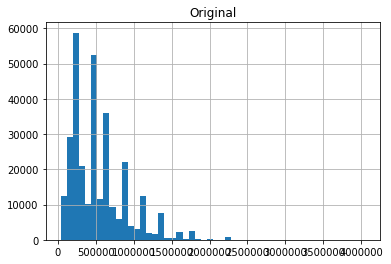

After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


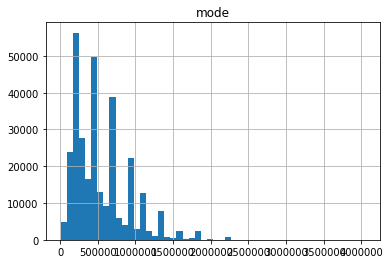

After replace NAs, numbers of row that AMT_GOODS_PRICE_1 is NAs: 0
count    3.075110e+05
mean     5.379176e+05
std      3.696220e+05
min      9.000000e+03
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE_1, dtype: float64


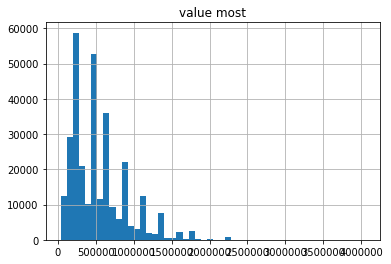

After replace NAs, numbers of row that AMT_GOODS_PRICE_2 is NAs: 0
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE_2, dtype: float64


In [13]:
app_train['AMT_GOODS_PRICE'].hist(bins = 50)
plt.title("Original")
plt.show()
value = app_train['AMT_GOODS_PRICE'].values

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))
print(app_train['AMT_GOODS_PRICE'].describe())

app_train['AMT_GOODS_PRICE_1'] = value
app_train.loc[app_train['AMT_GOODS_PRICE_1'].isnull(), 'AMT_GOODS_PRICE_1'] = list(mode_get[0])[0]
app_train['AMT_GOODS_PRICE_1'].hist(bins = 50)
plt.title("mode")
plt.show()

print("After replace NAs, numbers of row that AMT_GOODS_PRICE_1 is NAs: %i" % sum(app_train['AMT_GOODS_PRICE_1'].isnull()))
print(app_train['AMT_GOODS_PRICE_1'].describe())

app_train['AMT_GOODS_PRICE_2'] = value
app_train.loc[app_train['AMT_GOODS_PRICE_2'].isnull(), 'AMT_GOODS_PRICE_2'] = value_most
app_train['AMT_GOODS_PRICE_2'].hist(bins = 50)
plt.title("value most")
plt.show()

print("After replace NAs, numbers of row that AMT_GOODS_PRICE_2 is NAs: %i" % sum(app_train['AMT_GOODS_PRICE_2'].isnull()))
print(app_train['AMT_GOODS_PRICE_2'].describe())
